In [39]:
# install required packages
# utility
import numpy as np

# sklearn
from sklearn.metrics import confusion_matrix

# tensorflow
import tensorflow as tf

# plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## EDA and Preprocessing:

In [5]:
# load the data
mnist = tf.keras.datasets.mnist

In [6]:
# get the already split data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
# normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

## ANN Model for Image Classification:

In [69]:
# define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [70]:
# compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [71]:
# train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=6)

Epoch 1/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2957 - accuracy: 0.9151 - val_loss: 0.1400 - val_accuracy: 0.9589
Epoch 2/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1447 - accuracy: 0.9572 - val_loss: 0.1001 - val_accuracy: 0.9731
Epoch 3/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1075 - accuracy: 0.9677 - val_loss: 0.0915 - val_accuracy: 0.9733
Epoch 4/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0886 - accuracy: 0.9725 - val_loss: 0.0796 - val_accuracy: 0.9763
Epoch 5/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0767 - accuracy: 0.9759 - val_loss: 0.0682 - val_accuracy: 0.9785
Epoch 6/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0654 - accuracy: 0.9792 - val_loss: 0.0685 - val_accuracy: 0.9794


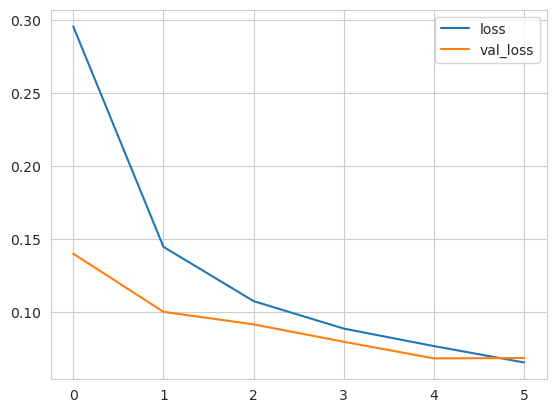

In [72]:
# plot loss per epoch
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

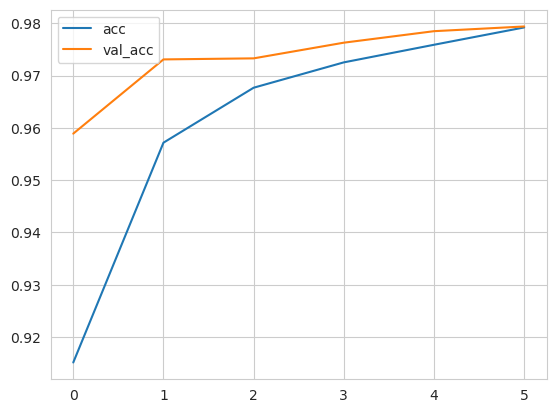

In [73]:
# plot accuracy per epoch
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

In [74]:
# evaluate the model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0685 - accuracy: 0.9794


[0.06848447024822235, 0.9793999791145325]

In [75]:
# make predictions
pred_logits = model.predict(X_test)

# convert probabilities to labels
y_pred = np.argmax(pred_logits, axis=1)
y_pred

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

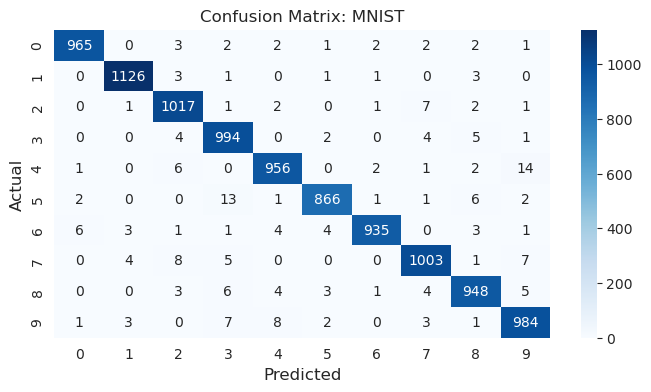

In [76]:
# utility function
# plot confusion matrix using sns heatmap
def plot_confusion_matrix(cf_matrix, title, xlabel='Predicted', ylabel='Actual', ticklabels=None, figsize=(8,4), fontdict={'fontsize':12}):
    
    # extract counts from confusion matrix
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    
    # create annotations for plot
    annotations = [f'{count}'.format(count) for count in group_counts]
    annotations = np.asarray(annotations).reshape(cf_matrix.shape)

    plt.figure(figsize = figsize, dpi=100)
    ax = sns.heatmap(cf_matrix, annot=annotations, fmt='', cmap='Blues')

    # set title
    ax.set_title(title, fontdict=fontdict)
    
    # set axes labels
    ax.set_xlabel(xlabel, fontdict=fontdict)
    ax.set_ylabel(ylabel, fontdict=fontdict)

    # tick labels - List must be in alphabetical order
    if ticklabels:
        # set axes tick labels
        ax.xaxis.set_ticklabels(ticklabels)
        ax.yaxis.set_ticklabels(ticklabels)

    # display the visualization of the confusion matrix.
    plt.show()


# plot the confusion matrix
plot_confusion_matrix(
    confusion_matrix(y_test, y_pred),
    'Confusion Matrix: MNIST',
)

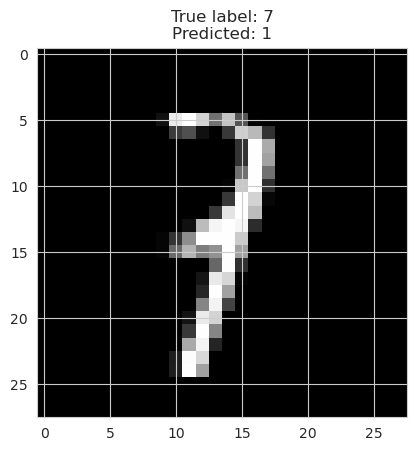

In [77]:
# show some misclassified examples
# extract all index which are misclassified
misclassified_idx = np.where(y_pred != y_test)[0]

# randomly choose one misclassified example
idx = np.random.choice(misclassified_idx)

plt.imshow(X_test[idx], cmap='gray')
plt.title(f'True label: {y_test[idx]}\nPredicted: {y_pred[idx]}');